In [15]:
from antlr4 import InputStream, CommonTokenStream
import time
from visualize import visualize_demonstration
import gurobipy as grb
import sys
import numpy as np
from typing import Callable
sys.path.append('../../pytelo/')

from wstl.wstl import WSTLAbstractSyntaxTreeExtractor
from wstl.wstl2milp import wstl2milp
from wstl.wstlLexer import wstlLexer
from wstl.wstlParser import wstlParser

from bicycleModel import BicycleModel

In [20]:
# read csv in carla_settings/demonstrations
data = np.genfromtxt('../carla_settings/demonstrations/trajectory-a_4.csv', delimiter=',')[1:,:]
x = data[:,0]
y = data[:,1]
th = data[:,2]
v = data[:,3]
t = data[:,4]

# coordinate transformations (-143, -4) is (0,2.5), (-144, -4) is (1,2.5)
x = -x - 143
y = y + 6.5
th = np.pi/2 - th
t = t - t[0]

In [21]:
# find zero 
len = x.shape[0]
x_prev = x[0]
zero_idx = 0

for i in range(1, len):
    if x_prev < 0 and x[i] >= 0:
        zero_idx = i
        break
    x_prev = x[i]

x = x[zero_idx:][::8]
y = y[zero_idx:][::8]
th = th[zero_idx:][::8]
v = v[zero_idx:][::8]
t = t[:len][::8]

In [22]:
# Define the pedestrian model
class pedestrian:
    def __init__(self):
        self.x_ped = 116.0 #+ 5*np.random.rand()
        self.y_ped = 17.0
    def __call__(self, t):
        if t <= 15: #16.45:
            vel = 1.2#1.1
            self.x_ped = self.x_ped #+ 0.1*np.random.randn(1)
            self.y_ped = 17.0 - vel*t
        return [self.x_ped, self.y_ped] 
ped = pedestrian()

# rollout pedestrian dynamics
pedestrian_position = np.array([ped(t[i]) for i in range(t.shape[0])])

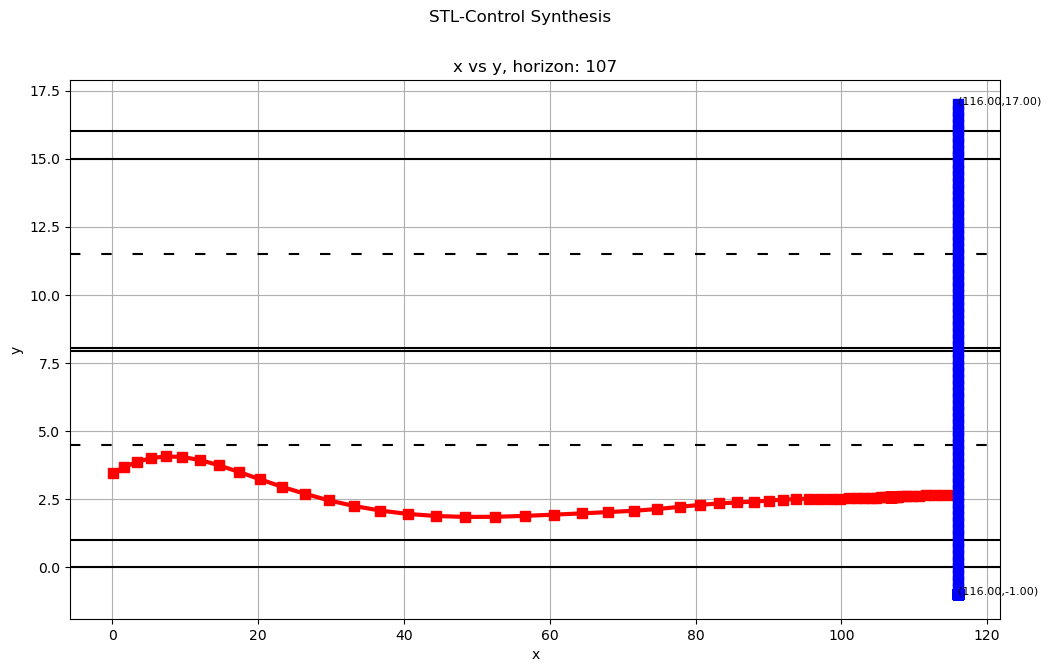

In [23]:
visualize_demonstration(x, y, pedestrian_position[:,0], pedestrian_position[:,1], t)